In this notebook I have used Python to explore the data and gain a better understanding about the features and target variable.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

#import time, datetime
from datetime import datetime, date
import seaborn as sns

#from scipy.stats import poisson, chi2_contingency
#from tqdm.notebook import tqdm
#from patsy import dmatrices

#import statsmodels.api as sm



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [63]:
PATH= "C:\\Users\\masud.pervez\\Documents\\SEB_project\\seb_project/"

In [40]:
# Load data
customer_df = pd.read_csv(f'{PATH}data//Customer.csv', sep=',')
district_df = pd.read_csv(f'{PATH}data//District.csv', sep=',')
transaction_df = pd.read_csv(f'{PATH}data//Transaction.csv', sep=',')
customer_df.head()

,CLIENT_ID,ACCOUNT_ID,GENDER,BIRTH_DT,ACTIVE,LOAN,DISTRICT_ID,SET_SPLIT
0,1,1,F,19701213,1,0,18,TRAIN
1,2,2,M,19450204,1,1,1,TRAIN
2,4,3,M,19561201,1,0,5,TEST
3,6,4,M,19190922,1,0,12,TRAIN
4,7,5,M,19290125,1,0,15,TRAIN


In [4]:
transaction_df.sample(5)

,TRANS_ID,ACCOUNT_ID,DATE,AMOUNT,BALANCE,TYPE,OPERATION
938782,330069,1125,19980811,6800.0,63358.3,WITHDRAWAL,WITHDRAWAL_IN_CASH
661744,24476,81,19971008,229.0,19938.4,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK
453836,649345,2219,19970106,10500.0,83106.6,WITHDRAWAL,WITHDRAWAL_IN_CASH
542229,3571878,1258,19970430,62.3,15474.5,CREDIT,NaN
392736,1225344,4195,19961001,11582.0,91938.3,WITHDRAWAL,WITHDRAWAL_IN_CASH


In [5]:
district_df.sample(5)

,DISTRICT_ID,N_INHAB,N_CITIES,URBAN_RATIO,AVG_SALARY,UNEMP_95,UNEMP_96,N_ENTR,CRIME_95,CRIME_96
45,46,112709,10,73.5,8369,1.79,2.31,117,2854,2618
70,71,161227,10,69.7,8678,5.93,5.57,102,4980,4595
50,51,121947,11,70.5,8541,2.51,2.97,131,3496,3839
44,45,77917,5,53.5,8390,2.28,2.89,132,2080,2122
7,8,112065,8,69.4,11277,1.25,1.44,127,5179,4987


In [12]:
# Change date type from int to datetime
# # Create Timestamp object
customer_df['BIRTH_DT'] = pd.to_datetime(customer_df.BIRTH_DT, format= "%Y%m%d")


In [13]:
def calculateAge(dob):
    '''This function will calculae age given a string/int dob.'''
    today= date.today() 
    dob= pd.to_datetime(dob, format= "%Y%m%d").date()
    #dob = datetime.strptime(str(dob), "%Y%m%d").date() # convert int to str first
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

In [14]:
age= customer_df['BIRTH_DT'].apply(calculateAge)
customer_df.insert(4, 'Age', age, True)
customer_df.head()

,CLIENT_ID,ACCOUNT_ID,GENDER,BIRTH_DT,Age,ACTIVE,LOAN,DISTRICT_ID,SET_SPLIT
0,1,1,F,1970-12-13,50,1,0,18,TRAIN
1,2,2,M,1945-02-04,76,1,1,1,TRAIN
2,4,3,M,1956-12-01,64,1,0,5,TEST
3,6,4,M,1919-09-22,101,1,0,12,TRAIN
4,7,5,M,1929-01-25,92,1,0,15,TRAIN


# Exploratory Data Analysis (EDA)

In [128]:
# Total no of customers

print('Total no of customers: {}'.format(customer_df['CLIENT_ID'].nunique()))
print('Total no of Transactions: {}'.format(transaction_df['TRANS_ID'].nunique()))
print('Duration of Transactions: {} to {}'.format(min(transaction_df['DATE']).date(), max(transaction_df['DATE']).date()))
print('Total no of Districts: {}'.format(district_df.shape[0]))

Total no of customers: 4500
Total no of Transactions: 1056320
Duration of Transactions: 1993-01-01 to 1998-12-31
Total no of Districts: 77


### Question: How many transactions did an average customer complete in the period? How much did they spend? Does it change over time?

In [97]:
print("No of transactions: {:.0f}" .format(transaction_df.shape[0]/transaction_df.ACCOUNT_ID.nunique()))
print("Average amount paid: {:.2f}".format(transaction_df.AMOUNT.mean()))

No of transactions: 235
Average amount paid: 5924.15


In [99]:
transaction_df['DATE'] = pd.to_datetime(transaction_df.DATE, format= "%Y%m%d")

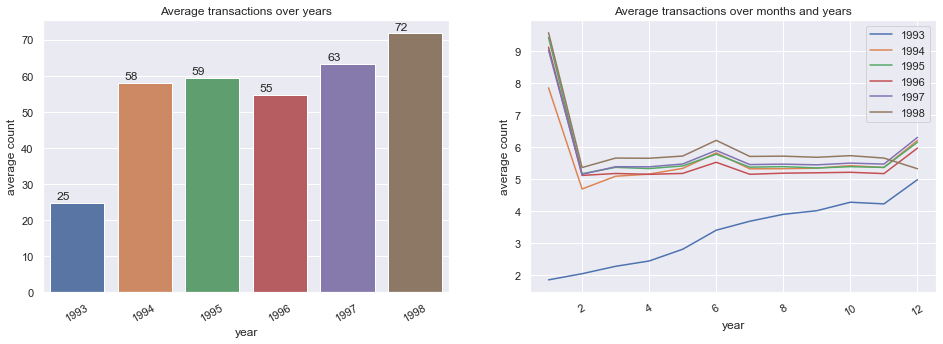

In [185]:
sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
trans_year= transaction_df.groupby(transaction_df['DATE'].dt.year).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())
#trans_year.plot(kind='bar', ax= ax1)
sns.barplot(y=trans_year, x=trans_year.index, ax= ax1)
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("year")
ax1.set_ylabel("average count")
ax1.set_title("Average transactions over years", fontsize=12)
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


# 2nd plot

trans_yearMonth= transaction_df.groupby([transaction_df['DATE'].dt.month, transaction_df['DATE'].dt.year]).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())
trans_yearMonth.unstack().plot(kind='line', ax= ax2)
plt.xticks(rotation=30, horizontalalignment="center")
ax2.set_title("Average transactions over months and years")
ax2.set_xlabel("year")
ax2.set_ylabel("average count")
ax2.legend(loc= 'best')
plt.savefig(f'{PATH}/results/plots/avg_transaction.png')
plt.show()



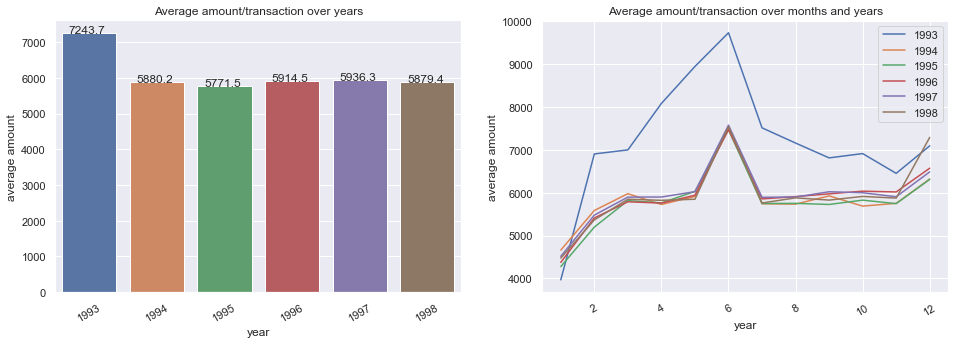

In [186]:
sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
trans_year= transaction_df.groupby(transaction_df['DATE'].dt.year).apply(lambda x: x['AMOUNT'].mean())
#trans_year.plot(kind='bar', ax= ax1)
sns.barplot(y=trans_year, x=trans_year.index, ax= ax1)
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("year")
ax1.set_ylabel("average amount")
ax1.set_title("Average amount/transaction over years", fontsize=12)
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


# 2nd plot

trans_yearMonth= transaction_df.groupby([transaction_df['DATE'].dt.month, transaction_df['DATE'].dt.year]).apply(lambda x: x['AMOUNT'].mean())
trans_yearMonth.unstack().plot(kind='line', ax= ax2)
plt.xticks(rotation=30, horizontalalignment="center")
ax2.set_title("Average amount/transaction over months and years")
ax2.set_xlabel("year")
ax2.set_ylabel("average amount")
ax2.legend(loc= 'best')
plt.savefig(f'{PATH}/results/plots/avg_transaction_year.png')
plt.show()


In [174]:
customer_transaction_df= pd.merge(customer_df, transaction_df, how= 'inner', on= 'ACCOUNT_ID')
customer_transaction_df.sample(5)
print(customer_transaction_df.shape)

(1056320, 15)


In [178]:
total_transactionByCustomer= customer_transaction_df.groupby('CLIENT_ID').agg({
    'TRANS_ID': 'count',
    'AMOUNT': sum
}).reset_index()


In [179]:
total_transactionByCustomer

,CLIENT_ID,TRANS_ID,AMOUNT
0,1,239,375174.5
1,2,478,3151479.3
2,4,117,295021.8
3,6,186,350971.4
4,7,84,166881.4
...,...,...,...
4495,13931,368,3295795.5
4496,13955,304,3957372.2
4497,13968,378,2948081.4
4498,13971,344,1330010.5


NameError: name 'total_transactionByCustomer' is not defined

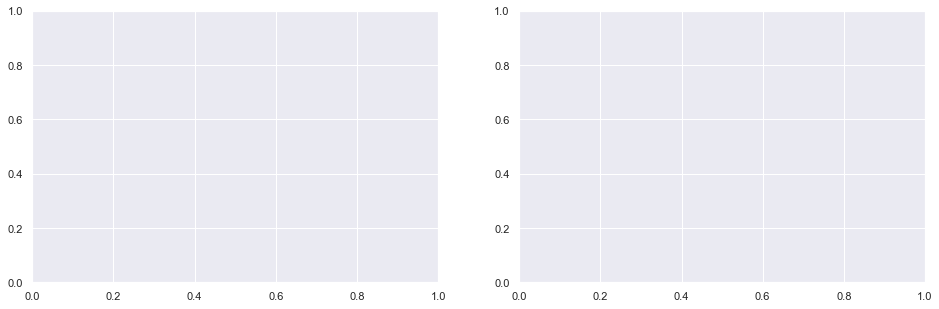

In [187]:
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))
#x='Sålt', kind="kde", hue= 'group
sns.distplot(total_transactionByCustomer["TRANS_ID"],ax= ax1)

sns.boxplot("TRANS_ID", data=total_transactionByCustomer, ax= ax2, palette="Set3")
plt.savefig(f'{PATH}/results/plots/transaction_dist.png')
plt.show()

In [ ]:
df['year-month'] = df['date'].apply(lambda x: str(x.year) + ' ' + str(x.month))
grouped = df.groupby('year-month')

In [ ]:
total_transactionByCustomer= customer_transaction_df.groupby(['DATE','CLIENT_ID']).agg({
    'TRANS_ID': 'count',
    'AMOUNT': sum
}).reset_index()

NameError: name 'customer_transaction_df' is not defined

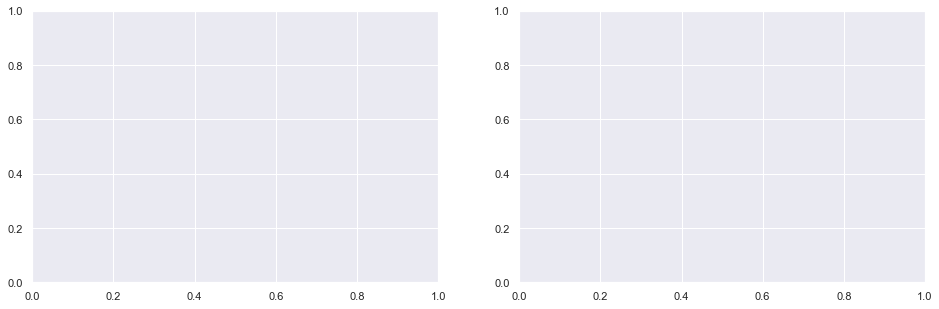

In [188]:
transaction_by_year= transaction_df.groupby(transaction_df['DATE'].dt.year).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())\
                        .reset_index() \
                        .rename(columns= {0: 'average_transactions'})

transaction_by_year

sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

sns.barplot(x='DATE', y= 'CLIENT_ID', 
              data= customer_transaction_df.groupby(customer_transaction_df.DATE.dt.year).agg({'CLIENT_ID':'nunique'}).reset_index(), 
              ax= ax1)

#transaction_by_year.plot('DATE', 0,kind='line')
sns.lineplot(x= 'DATE', y= 'average_transactions', data= transaction_by_year, ax= ax2)



# 1st plot
# sns.barplot(data= test_data.groupby(['dayOfWeek', 'group']).agg({'FSST_nr': lambda x: int(x.count()/2)}).reset_index(), 
#               x= "dayOfWeek",y= "FSST_nr", hue='group',
#               order=['Må', 'Ti','On',  'To', 'Fr',  'Lö', 'Sö'], ax= ax1)
# ax1.legend(loc= "lower left")
# ax1.set_xlabel("Veckodag")
# ax1.set_ylabel("Antal butiker")
# ax1.set_title("Antalet butiker per grupp", fontsize=12)
# for p in ax1.patches:
#         ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


# # 2nd plot
# sns.barplot(x="dayOfWeek", y="Sold_Out", hue='group', data=test_data, 
#             order=['Må', 'Ti','On',  'To', 'Fr',  'Lö', 'Sö'], ax= ax2, ci= None)
# ax2.set_xlabel("Veckodag")
# ax2.set_ylabel("Sold out")
# ax2.set_title("Fördelning av 'sold out' i veckodag per grupp")
# ax2.legend()
plt.savefig(f'{PATH}/results/plots/avg_transaction_period.png')
plt.show()

### Question: Do different customer profiles show different behavior? Is the transaction pattern homogeneous across geographic regions?

- Visualize one of your findings

In [181]:
merge_df= customer_transaction_df.merge(district_df, how = 'inner', on="DISTRICT_ID")

NameError: name 'merge_df' is not defined

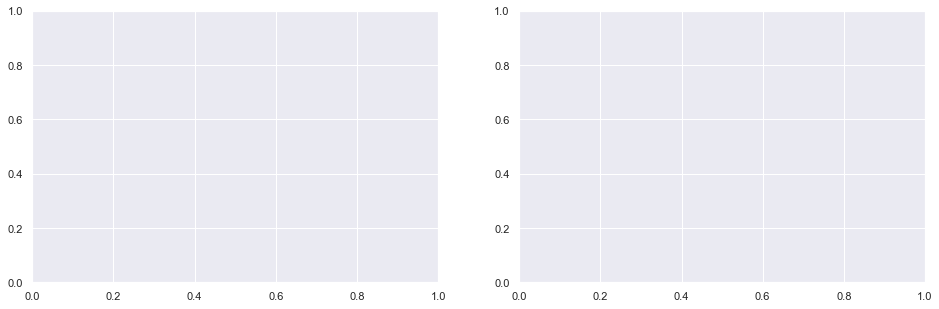

In [189]:
sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
trans_gender= merge_df.groupby(merge_df['GENDER']).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())
#trans_year.plot(kind='bar', ax= ax1)
sns.barplot(y=trans_gender, x=trans_gender.index, ax= ax1)
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("Gender")
ax1.set_ylabel("Count")
ax1.set_title("Average transactions per account/customer in Gender", fontsize=12)
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


# 2nd plot

amount_gender= merge_df.groupby(merge_df['GENDER']).apply(lambda x: x['AMOUNT'].mean())
#amount_gender.plot(kind='barh', ax= ax2)
sns.barplot(y= amount_gender, x= amount_gender.index, ax=ax2)
plt.xticks(rotation=30, horizontalalignment="center")
ax2.set_title("Average amount spend per transactions in Gender" , fontsize=12)
ax2.set_xlabel("Gender")
ax2.set_ylabel("Amount")
for p in ax2.patches:
        ax2.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

plt.savefig(f'{PATH}/results/plots/transaction_gender.png')
plt.show()


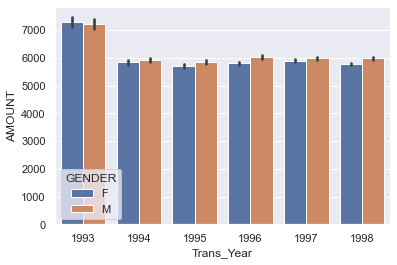

In [270]:
sns.barplot(x= 'Trans_Year', y= 'AMOUNT', hue= 'GENDER', data= merge_df) # Seaborn barplot shows the average for each group

plt.show()

Customer profile shows almost 50-50 split on total transaction in their Gender category.
It also shows that on average male customer do a transaction in 6000 and female with 5847. So customer profile interms of gender doesn't show any different behaviour over the period.

In [195]:
merge_df.columns

Index(['CLIENT_ID', 'ACCOUNT_ID', 'GENDER', 'BIRTH_DT', 'Age', 'ACTIVE',
       'LOAN', 'DISTRICT_ID', 'SET_SPLIT', 'TRANS_ID', 'DATE', 'AMOUNT',
       'BALANCE', 'TYPE', 'OPERATION', 'N_INHAB', 'N_CITIES', 'URBAN_RATIO',
       'AVG_SALARY', 'UNEMP_95', 'UNEMP_96', 'N_ENTR', 'CRIME_95', 'CRIME_96'],
      dtype='object')

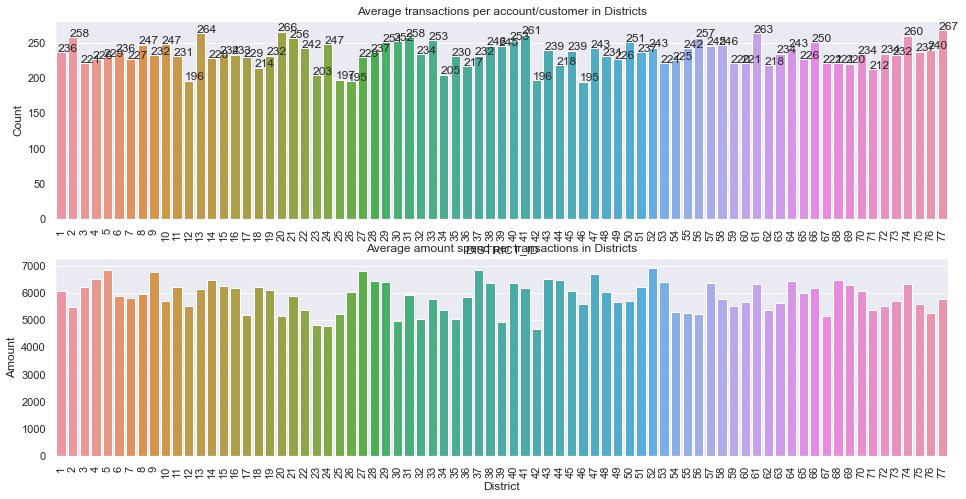

In [218]:
sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 2, ncols = 1,figsize=(16,8))

# 1st plot
trans_district= merge_df.groupby(merge_df['DISTRICT_ID']).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())
#trans_year.plot(kind='bar', ax= ax1)
sns.barplot(y=trans_district, x=trans_district.index, ax= ax1)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel("Count")
ax1.set_title("Average transactions per account/customer in Districts", fontsize=12)
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


# 2nd plot

amount_district= merge_df.groupby(merge_df['DISTRICT_ID']).apply(lambda x: x['AMOUNT'].mean())
#amount_gender.plot(kind='barh', ax= ax2)
sns.barplot(y= amount_district, x= amount_district.index, ax=ax2)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("Average amount spend per transactions in Districts" , fontsize=12)
ax2.set_xlabel("District")
ax2.set_ylabel("Amount")

plt.show()


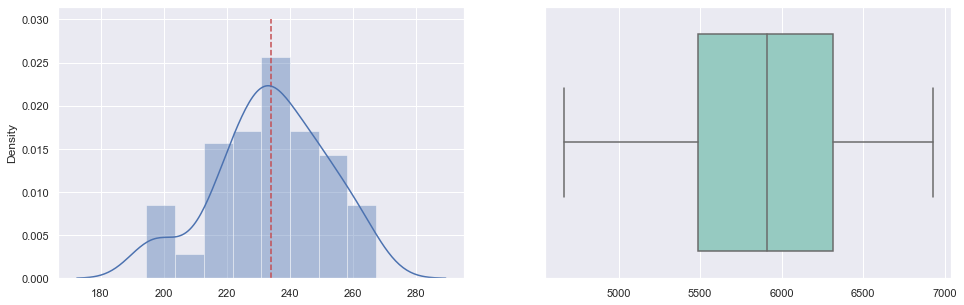

In [216]:
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))
#x='Sålt', kind="kde", hue= 'group
sns.distplot(trans_district,ax= ax1, kde=True)
ax1.vlines(trans_district.mean(), ymin= 0, ymax= 0.030, color= 'r', linestyles= 'dashed')

sns.boxplot(amount_district, ax= ax2, palette="Set3")
plt.show()

In [204]:
trans_district.describe()

count     77.000000
mean     234.214801
std       17.545687
min      194.548387
25%      224.819549
50%      233.595890
75%      246.371429
max      267.465116
dtype: float64

<Figure size 1152x576 with 0 Axes>

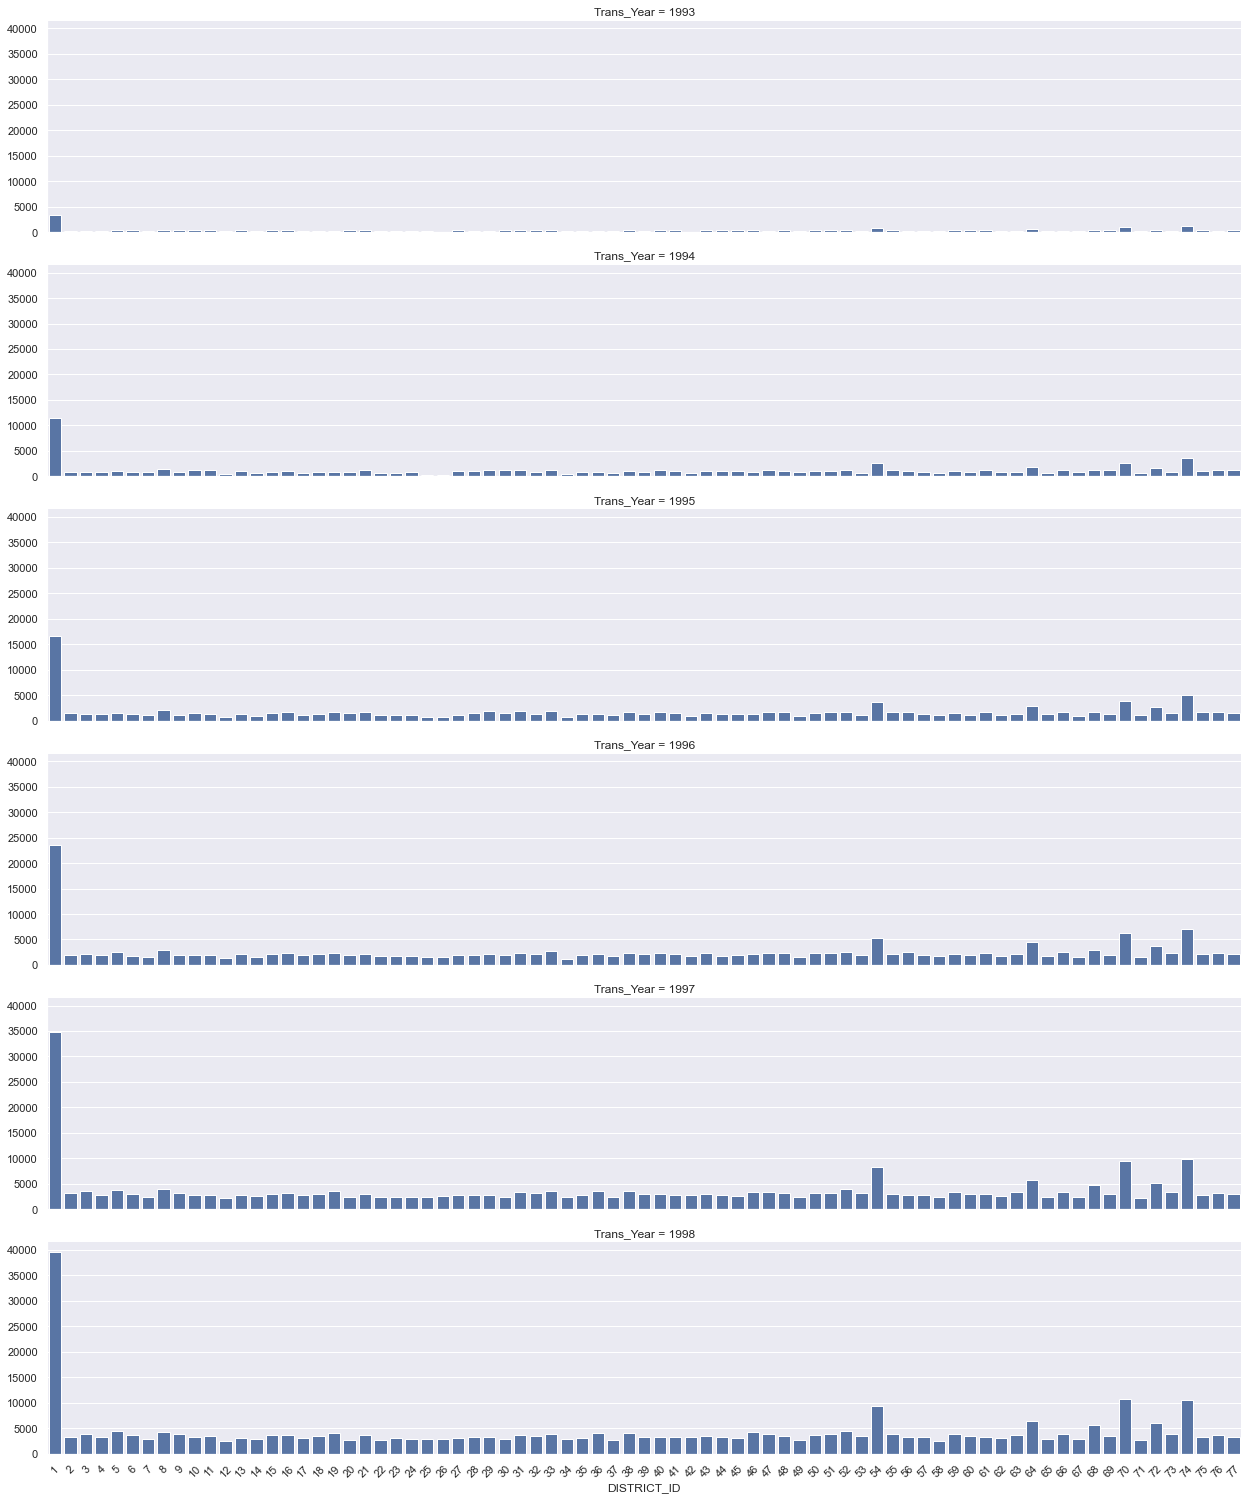

In [262]:
plt.figure(figsize=(16,8))
merge_df['Trans_Year']= merge_df.DATE.dt.year
g = sns.FacetGrid(merge_df,  row='Trans_Year', height=3.5, aspect=5) # aspect * height gives the width of each facet in inches
plt.xticks(rotation= 45)
g.map(sns.countplot, "DISTRICT_ID")
plt.show()

In [243]:
merge_df.pivot_table(index= 'DISTRICT_ID', columns= 'N_CITIES' ,
                     values= 'TRANS_ID', aggfunc='count').reset_index()

N_CITIES,DISTRICT_ID,1,2,3,4,5,6,7,8,9,10,11
0,1,129346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,10825.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,12137.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,10628.0,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,13744.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,NaN,NaN,NaN,NaN,NaN,NaN,12053.0,NaN,NaN,NaN,NaN
73,74,37452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,75,NaN,NaN,NaN,NaN,11144.0,NaN,NaN,NaN,NaN,NaN,NaN
75,76,NaN,NaN,NaN,NaN,NaN,NaN,12226.0,NaN,NaN,NaN,NaN


# (B) Predictive model

# Data Pre-processing

In [300]:
# Aggregate transaction dataset for merging

transaction_aggdf= transaction_df.groupby('ACCOUNT_ID').agg(
                                                max_date=('DATE', max),
                                                min_date=('DATE', min),
                                                unique_dates= ('DATE' , "nunique"),
                                                num_days=(
                                                    "DATE", 
                                                    lambda x: (max(x) - min(x)).days),
                                                trans_amount= ('AMOUNT', 'mean'),
                                                last_balance= ('BALANCE', 'last'),
                                                type_most= ('TYPE', lambda x: x.value_counts().index[0]),
                                                operation_most= ('OPERATION', lambda x: x.value_counts().index[0])
                                                #type_most= ('TYPE', pd.Series.mode),
                                                #operation_most= ('OPERATION', pd.Series.mode)
                                                ). reset_index()

In [301]:
# grouped = transaction_df.loc[transaction_df['ACCOUNT_ID']== 925].groupby('ACCOUNT_ID', as_index=False).agg({
#     "DATE": [min, max, "nunique", lambda x: (max(x) - min(x)).days],
    
    
# }) 
# # Using ravel, and a string join, we can create better names for the columns:
# grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
# grouped

In [325]:
model_df = (pd.merge(customer_df, district_df, how = 'left', on = "DISTRICT_ID")\
            .merge(transaction_aggdf , how ='left', on = 'ACCOUNT_ID')
           )
model_df.sample(5)

,CLIENT_ID,ACCOUNT_ID,GENDER,BIRTH_DT,Age,ACTIVE,LOAN,DISTRICT_ID,SET_SPLIT,N_INHAB,...,CRIME_95,CRIME_96,max_date,min_date,unique_dates,num_days,trans_amount,last_balance,type_most,operation_most
3677,4665,3871,F,1926-08-27,94,1,0,9,TRAIN,81344,...,2987,2487,1998-12-31,1993-01-08,342,2183,1370.803555,59739.6,WITHDRAWAL,WITHDRAWAL_IN_CASH
1350,1724,1422,F,1934-10-21,86,1,0,68,TRAIN,228848,...,5623,5887,1998-12-31,1993-04-09,290,2092,2122.012672,38150.4,WITHDRAWAL,WITHDRAWAL_IN_CASH
1502,1916,1582,M,1926-07-19,94,1,0,28,TRAIN,72541,...,1580,1525,1998-12-31,1996-05-01,137,974,2163.074269,19305.2,WITHDRAWAL,WITHDRAWAL_IN_CASH
72,91,77,M,1940-08-07,80,1,0,63,TRAIN,86513,...,1562,1460,1998-12-31,1996-11-19,82,772,8922.564423,19338.7,CREDIT,WITHDRAWAL_IN_CASH
3417,4338,3595,M,1944-10-25,76,1,0,30,TRAIN,94812,...,2985,2804,1998-12-31,1994-05-01,255,1705,4669.002208,29928.6,WITHDRAWAL,WITHDRAWAL_IN_CASH


In [303]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CLIENT_ID       4500 non-null   int64         
 1   ACCOUNT_ID      4500 non-null   int64         
 2   GENDER          4500 non-null   object        
 3   BIRTH_DT        4500 non-null   datetime64[ns]
 4   Age             4500 non-null   int64         
 5   ACTIVE          4500 non-null   int64         
 6   LOAN            4500 non-null   int64         
 7   DISTRICT_ID     4500 non-null   int64         
 8   SET_SPLIT       4500 non-null   object        
 9   N_INHAB         4500 non-null   int64         
 10  N_CITIES        4500 non-null   int64         
 11  URBAN_RATIO     4500 non-null   float64       
 12  AVG_SALARY      4500 non-null   int64         
 13  UNEMP_95        4500 non-null   object        
 14  UNEMP_96        4500 non-null   float64       
 15  N_EN

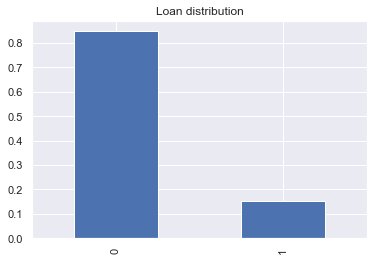

In [275]:
# plot bar chart
model_df['LOAN'].value_counts(normalize=True).plot.bar(title= 'Loan distribution')
plt.show()

GENDER     F     M
LOAN              
0       1860  1958
1        348   334


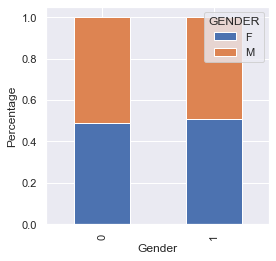

In [286]:
print(pd.crosstab(model_df['LOAN'], model_df['GENDER']))

Gender= pd.crosstab(model_df['LOAN'], model_df['GENDER'])
Gender.div(Gender.sum(1).astype(float), axis= 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

In [277]:
# Analyze applicant age

# making bins for Coapplicant income variable
bins = [35,50,70, 80, 110]
group = ['35-50','51-70','71-80','80+']
Age_bin = pd.cut(model_df['Age'],bins,labels=group)
model_df.insert(5, 'Age_bin', Age_bin, True)
model_df.Age_bin.value_counts()

51-70    1626
35-50    1027
80+      1007
71-80     840
Name: Age_bin, dtype: int64

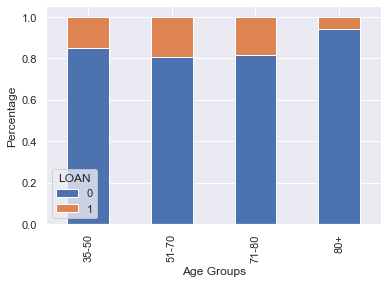

In [278]:
# plot the chart
Age_bin_loan = pd.crosstab(model_df['Age_bin'],model_df['LOAN'])
Age_bin_loan.div(Age_bin_loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Age Groups')
P = plt.ylabel('Percentage')

It seems that age is important for deciding whether a customer is granted a loan or not.

type_most  CREDIT  WITHDRAWAL
LOAN                         
0             412        3406
1              22         660


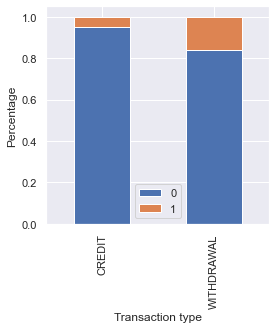

In [315]:
print(pd.crosstab(model_df['LOAN'], model_df['type_most']))

type_most= pd.crosstab( model_df['type_most'], model_df['LOAN'])
type_most.div(type_most.sum(1).astype(float), axis= 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Transaction type')
plt.legend(loc= 'best')
p = plt.ylabel('Percentage')

The customers who has their most transaction type by WITHDRAWAL, have high probability to get a loan compare to those customers who have their most transaction type by CREDIT.

operation_most  COLLECTION_FROM_OTHER_BANK  CREDIT_IN_CASH  \
LOAN                                                         
0                                        5             134   
1                                        0               4   

operation_most  REMITTANCE_TO_OTHER_BANK  WITHDRAWAL_IN_CASH  
LOAN                                                          
0                                    428                3251  
1                                    119                 559  


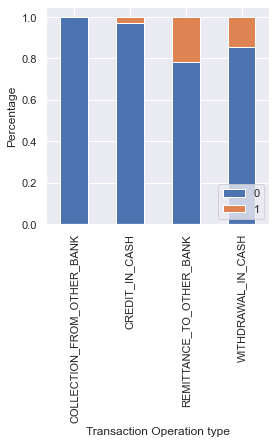

In [471]:
print(pd.crosstab(model_df['LOAN'], model_df['operation_most']))

type_most= pd.crosstab( model_df['operation_most'], model_df['LOAN'])
type_most.div(type_most.sum(1).astype(float), axis= 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Transaction Operation type')
plt.legend(loc= 'lower right')
p = plt.ylabel('Percentage')

In [327]:
# Convert gender from F, M to 0,1
model_df['GENDER'].replace({'F':0, 'M':1}, inplace = True)

In [329]:
model_df['DISTRICT_ID']= model_df['DISTRICT_ID'].astype('str')

In [330]:
model_df['UNEMP_95'] = model_df['UNEMP_95'].replace('?', np.nan).astype(float)
model_df['CRIME_95']= model_df['CRIME_95'].replace('?', np.nan).astype(float) 


In [331]:
# replacing missing values
model_df['UNEMP_95'].fillna(np.mean(df1['UNEMP_95']),inplace=True )
model_df['CRIME_95'].fillna(np.mean(df1['CRIME_95']),inplace=True )

In [332]:
list_columns= model_df.select_dtypes(include='O').columns
d= {}
for col in list_columns:
    value= len(model_df[col].value_counts().index)
    d[col]= value

# Create dataframe from dic and make keys, index in dataframe
value_count_df = pd.DataFrame.from_dict(d, orient='index')
value_count_df.rename(columns= {0: 'counts'}, inplace=True)
value_count_df.sort_values(by= 'counts', ascending=False)


,counts
DISTRICT_ID,77
operation_most,4
SET_SPLIT,2
type_most,2


In [366]:
# Train-Test split

train= model_df.loc[df1.SET_SPLIT== 'TRAIN']
test= model_df.loc[df1.SET_SPLIT== 'TEST']



In [367]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3601 entries, 0 to 4499
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CLIENT_ID       3601 non-null   int64         
 1   ACCOUNT_ID      3601 non-null   int64         
 2   GENDER          3601 non-null   int64         
 3   BIRTH_DT        3601 non-null   datetime64[ns]
 4   Age             3601 non-null   int64         
 5   ACTIVE          3601 non-null   int64         
 6   LOAN            3601 non-null   int64         
 7   DISTRICT_ID     3601 non-null   object        
 8   SET_SPLIT       3601 non-null   object        
 9   N_INHAB         3601 non-null   int64         
 10  N_CITIES        3601 non-null   int64         
 11  URBAN_RATIO     3601 non-null   float64       
 12  AVG_SALARY      3601 non-null   int64         
 13  UNEMP_95        3601 non-null   float64       
 14  UNEMP_96        3601 non-null   float64       
 15  N_EN

In [381]:
target= 'LOAN'
IDcols = ['CLIENT_ID', 'ACCOUNT_ID', 'DISTRICT_ID']
deleted_cols= ['BIRTH_DT','SET_SPLIT', 'max_date', 'min_date']

predictors = [x for x in train.columns if x not in target and  x not in IDcols and  x not in deleted_cols]

In [431]:
# drop "Loan_Status" and assign it to target variable
X = train[predictors]
y = train[target]

# adding dummies to the dataset
X = pd.get_dummies(X)
# train = pd.get_dummies(train)
# test = pd.get_dummies(test)

print(X.shape, train.shape, test.shape)

(3601, 22) (3601, 26) (899, 26)


In [31]:
# Convert to dummy variables
def one_hot_encoder(df, ohe_cols= []):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=ohe_cols)
    
    # Rename Column names
    import re

    df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    print('New df shape:{}'.format(df.shape))
    return df

# Model Development and Evaluation

In [432]:
# import library
from sklearn.model_selection import train_test_split

In [433]:

# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=123,stratify= y)

# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((2520, 22), (1081, 22), (2520,), (1081,))

In [ ]:
# Create Basic Models
# Create a list of classifiers

classifiers = [
    LinearRegression(),
    ElasticNet(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5),
    Lasso(alpha =16, random_state=100),
    ElasticNet(alpha=0.8),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(), 
    LinearSVR(), 
    NuSVR(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
train_score = []
test_score = []
models = []
rmse = []
i = 0

for classifier in classifiers:
    classifier.fit(X, y)   
    name.append(type(classifier).__name__)
    train_score.append(classifier.score(X_train, y_train))
    test_score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

# Comparing model performance

df_score = pd.DataFrame(list(zip(name,rmse, train_score, test_score, models)),columns=['name','rmse','train_score','test_score',"model"])
df_score.set_index('name',inplace=True)
print(df_score.sort_values(by=['test_score'],inplace=True))

In [434]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [436]:
# fit the model
model_lr= LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00001
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00022
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00003
Feature: 12, Score: -0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: -0.00000
Feature: 27, Score: -0.00000
Feature: 28, Score: -0.00000
Feature: 29, Score: -0.00000
Feature: 30, Score: -0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: -0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: -0.00000
Feature:

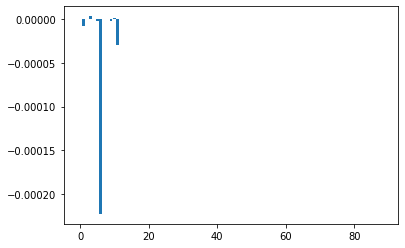

In [47]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Running the example fits the model, then reports the coefficient value for each feature.

In [438]:
# make prediction
pred_cv = model_lr.predict(x_cv)

# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.8399629972247918

In [439]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.8399629972247918

[[888  29]
 [144  20]]


Text(30.5, 0.5, 'True')

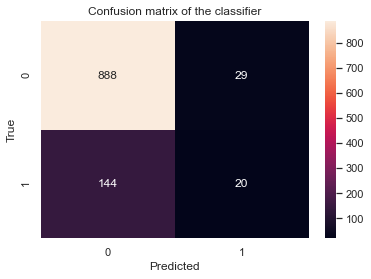

In [440]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [441]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       917
           1       0.41      0.12      0.19       164

    accuracy                           0.84      1081
   macro avg       0.63      0.55      0.55      1081
weighted avg       0.79      0.84      0.80      1081



## Logistic Regression using stratified k-folds cross-validation

In [442]:
from sklearn.model_selection import StratifiedKFold

In [451]:
# let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))



1 of kfold 5 
accuracy_score 0.8432539682539683
CV accuracy_score 0.8408880666049954

2 of kfold 5 
accuracy_score 0.8472222222222222
CV accuracy_score 0.849213691026827

3 of kfold 5 
accuracy_score 0.8373015873015873
CV accuracy_score 0.8427382053654024

4 of kfold 5 
accuracy_score 0.8571428571428571
CV accuracy_score 0.8436632747456059

5 of kfold 5 
accuracy_score 0.8412698412698413
CV accuracy_score 0.84736355226642

 Mean Validation Accuracy 0.8452380952380952


In [453]:
# Decission tree

# let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.
from sklearn import tree

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))



1 of kfold 5 
accuracy_score 0.7817460317460317
CV accuracy_score 0.7890841813135985

2 of kfold 5 
accuracy_score 0.7876984126984127
CV accuracy_score 0.8048103607770583

3 of kfold 5 
accuracy_score 0.8253968253968254
CV accuracy_score 0.7890841813135985

4 of kfold 5 
accuracy_score 0.7817460317460317
CV accuracy_score 0.7890841813135985

5 of kfold 5 
accuracy_score 0.7936507936507936
CV accuracy_score 0.788159111933395

 Mean Validation Accuracy 0.794047619047619


In [454]:
# Random Forest

# let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.
from sklearn.ensemble import RandomForestClassifier

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth= 7)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))



1 of kfold 5 
accuracy_score 0.8492063492063492
CV accuracy_score 0.849213691026827

2 of kfold 5 
accuracy_score 0.8511904761904762
CV accuracy_score 0.849213691026827

3 of kfold 5 
accuracy_score 0.8492063492063492
CV accuracy_score 0.84736355226642

4 of kfold 5 
accuracy_score 0.8472222222222222
CV accuracy_score 0.8482886216466234

5 of kfold 5 
accuracy_score 0.8472222222222222
CV accuracy_score 0.849213691026827

 Mean Validation Accuracy 0.8488095238095237


### Grid Search for hyper parameter tuning

In [456]:
from sklearn.model_selection import GridSearchCV

paramgrid = {"max_depth": list(range(1,10,2)), "n_estimators": list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

# from sklearn.model_selection import train_test_split

# x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)

grid_search.best_estimator_
#RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

RandomForestClassifier(max_depth=9, n_estimators=121, random_state=1)

In [466]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth= 9, n_estimators=121)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))


1 of kfold 5 
accuracy_score 0.8492063492063492
CV accuracy_score 0.8501387604070305

2 of kfold 5 
accuracy_score 0.8511904761904762
CV accuracy_score 0.849213691026827

3 of kfold 5 
accuracy_score 0.8511904761904762
CV accuracy_score 0.84736355226642

4 of kfold 5 
accuracy_score 0.8511904761904762
CV accuracy_score 0.849213691026827

5 of kfold 5 
accuracy_score 0.8472222222222222
CV accuracy_score 0.849213691026827

 Mean Validation Accuracy 0.85


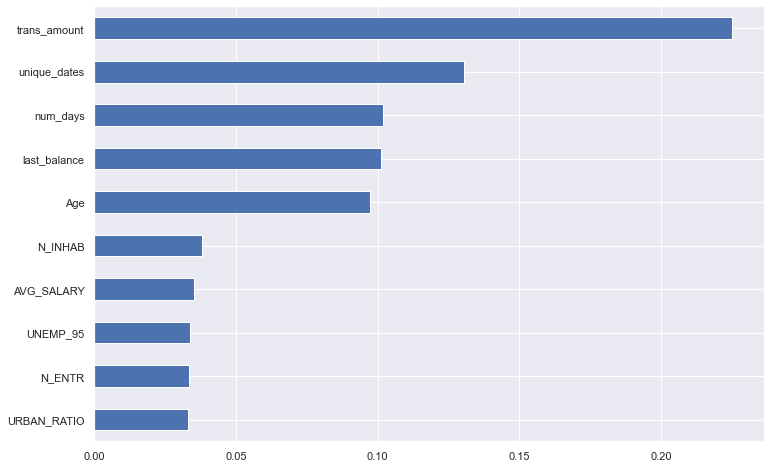

In [467]:
feat_importances=pd.Series(model.feature_importances_, index=X.columns)
ax=feat_importances.sort_values(ascending=False).nlargest(10).plot(kind='barh', figsize=(12,8))
ax.invert_yaxis()
plt.show()


We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

In [468]:
# XGBOOST
from xgboost import XGBClassifier

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = XGBClassifier(random_state=1, max_depth= 5, n_estimators=500)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))


1 of kfold 5 
[13:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8472222222222222
CV accuracy_score 0.8307123034227567

2 of kfold 5 
[13:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8551587301587301
CV accuracy_score 0.8279370952821462

3 of kfold 5 
[13:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:lo

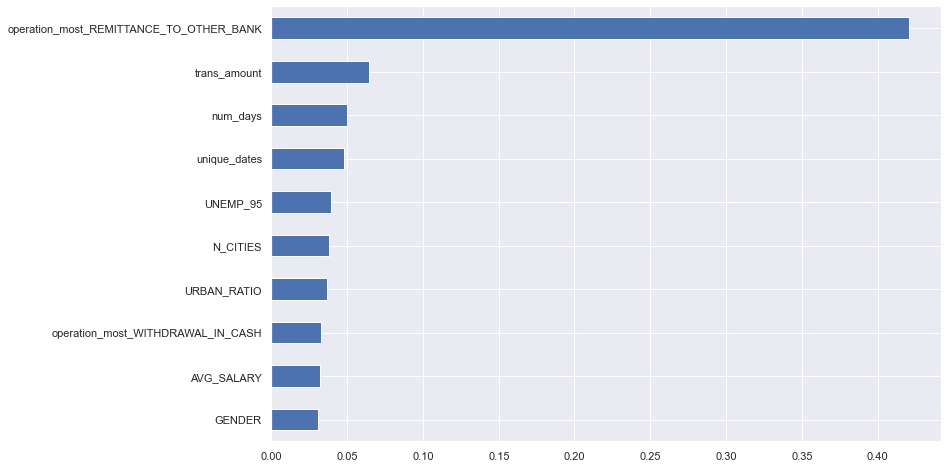

In [469]:
feat_importances=pd.Series(model.feature_importances_, index=X.columns)
ax=feat_importances.sort_values(ascending=False).nlargest(10).plot(kind='barh', figsize=(12,8))
ax.invert_yaxis()
plt.show()

### Feature Engineering

In [ ]:
Balance Income — This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [354]:
# import library
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=100)
model_rf.fit(x_train, y_train)
pred_cv = model_rf.predict(x_cv)
# calculate accuracy score
accuracy_score(y_cv, pred_cv)dd


0.849213691026827

AttributeError: 'Text' object has no property 'textsize'

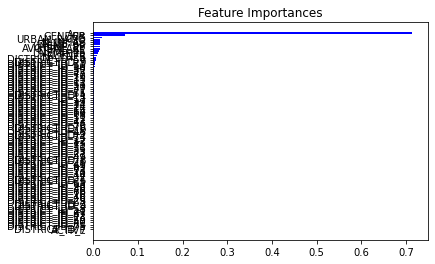

In [60]:
# plotting the feature importance
names = x_train.columns.tolist()
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.yticks(textsize=8)
plt.xlabel('Relative Importance')
plt.show()

In [357]:
# import library
import xgboost as xgb

model_xgb = xgb.XGBClassifier(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=10000,                                                                    
    subsample=0.8,
    random_state=34
) 

model_xgb.fit(x_train, y_train)
pred = model_xgb.predict(x_cv)

# calculate accuracy score
accuracy_score(y_cv, pred)


[10:54:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8371877890841813

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


Define a function which will help us create XGBoost models and perform cross-validation. 

In [414]:
def modelfit(alg, dtrain, predictors, target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [363]:
## xgboost’s sklearn wrapper doesn’t have a “feature_importances” metric but a get_fscore() function which does the same job

In [376]:
target= 'LOAN'
IDcols = ['CLIENT_ID', 'ACCOUNT_ID', 'DISTRICT_ID']
deleted_cols= ['BIRTH_DT','SET_SPLIT', 'max_date', 'min_date']

predictors = [x for x in train.columns if x not in target and  x not in IDcols and  x not in deleted_cols]


In [419]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1, dtrain= [x_train, y_train], predictors, target)

SyntaxError: positional argument follows keyword argument (<ipython-input-419-847e9f929bd8>, line 14)

In [396]:
#Choose all predictors except target & IDcols
#predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(x_train, y_train)
#modelfit(xgb1, train, predictors)
# split the data into train and cross validation set
# x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=123,stratify= y)

# # take a look at the dimension of the data
# x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

[12:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [423]:
d= xgb1.get_booster().get_fscore()
total = sum(d.values())
d1 = { k: d[k]/total for k in d }
d1

{'Age': 0.10002266802674827,
 'type_most_CREDIT': 0.0017567720729910461,
 'num_days': 0.13748158222826704,
 'AVG_SALARY': 0.046072764365861954,
 'CRIME_95': 0.027825002833503344,
 'CRIME_96': 0.023688087951943784,
 'unique_dates': 0.1286410517964411,
 'URBAN_RATIO': 0.037288904000906724,
 'UNEMP_95': 0.03445540065737278,
 'last_balance': 0.13884166383316332,
 'trans_amount': 0.14977898673920434,
 'operation_most_WITHDRAWAL_IN_CASH': 0.006290377422645359,
 'UNEMP_96': 0.03190524764819223,
 'N_INHAB': 0.045392723563413805,
 'operation_most_REMITTANCE_TO_OTHER_BANK': 0.006007027088291964,
 'GENDER': 0.019777853337866937,
 'N_ENTR': 0.04097245834750085,
 'N_CITIES': 0.023461407684461068,
 'type_most_WITHDRAWAL': 0.00034002040122407346}

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [422]:
xgb1.fit(x_train, y_train)

[12:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train[target])

In [ ]:
modelfit(gsearch3.best_estimator_, train, predictors)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_k

Feature: 0, Score: 0.01450
Feature: 1, Score: 0.01622
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01445
Feature: 4, Score: 0.01351
Feature: 5, Score: 0.01422
Feature: 6, Score: 0.01376
Feature: 7, Score: 0.01393
Feature: 8, Score: 0.01388
Feature: 9, Score: 0.01475
Feature: 10, Score: 0.01392
Feature: 11, Score: 0.01362
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01073
Feature: 14, Score: 0.01195
Feature: 15, Score: 0.01170
Feature: 16, Score: 0.01021
Feature: 17, Score: 0.01337
Feature: 18, Score: 0.01249
Feature: 19, Score: 0.01072
Feature: 20, Score: 0.01118
Feature: 21, Score: 0.01106
Feature: 22, Score: 0.01434
Feature: 23, Score: 0.01152
Feature: 24, Score: 0.01270
Feature: 25, Score: 0.01219
Feature: 26, Score: 0.01484
Feature: 27, Score: 0.00912
Feature: 28, Score: 0.01073
Feature: 29, Score: 0.01408
Feature: 30, Score: 0.01118
Feature: 31, Score: 0.01240
Feature: 32, Score: 0.00892
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.01138
Feature: 35, Score: 0.01466
Fe

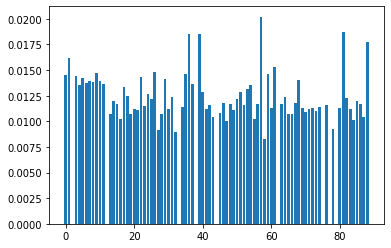

In [53]:
# get importance
importance = model_xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## (C) A/B testing (optional bonus question)

Problem: Finding the optimal channel between email and mobile app to provide loan offer.

How would you select which customers are in the email group or in the mobile app group in the test?

Assume all customers have email address and mobile app. Customers we select for each group are chosen randomly inorder to prevent any selection bias.

Suppose a historic loan campaign conversion rate is 10%, then We might want to increase that to 15% as an example.

Here is the hypothesis to test during the test:

$H_{0}:$ The loan conversion rate is the same for the groups email and mobile app. 

$H_{1}:$ The loan conversion rate is different among the groups email and mobile app.

In [8]:
import statsmodels.stats.proportion as proportion

In [9]:
import statsmodels.stats.proportion as proportion
import numpy as np
converted = np.array([486, 527])
clicks = np.array([5000, 5000])
chisq, pvalue, table = proportion.proportions_chisquare(converted, clicks)
print('chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))
print("Contingency Table:")
print(table)

chisq =1.846, pvalue = 0.174
Contingency Table:
(array([[ 486, 4514],
       [ 527, 4473]]), array([[ 506.5, 4493.5],
       [ 506.5, 4493.5]]))


In [13]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([486, 527])
nobs = np.array([5000, 5000])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.174


Method I: use proportions test
Proportion test can be used since the chi-square distribution is the square of a normal distribution
In this case (a two-sampled case with two sided alternative), the Chi-Square test below produced the same value as proportion Z test.

In [ ]:
use proportions test

In [ ]:
from statsmodels.stats.proportion import proportions_ztest


def compare_two_groups(array_1, array_2, alpha):
    metric= np.array([tmp_df.groupby('group')['Sold_Out'].sum()[0], tmp_df.groupby('group')['Sold_Out'].sum()[1]]) # sold out for each group
    n_samples= np.array([tmp_df.groupby('group')['FSST_nr'].count()[0], tmp_df.groupby('group')['FSST_nr'].count()[1]]) # samples for each group

    
    zscore, p_value =proportions_ztest(metric, n_samples, alternative='two-sided')
    print('Statistics= %.3f , pvalue= %.3f' % (zscore, p_value))
    if p_value > alpha:
        print("Same distributions (fail to reject H0)")
    else: 
        print("Different distributions (reject H0)")

In [ ]:
group1 = test_data.loc[test_data.group == 'test']['Sålt']
group2 = test_data.loc[test_data.group == 'kontrollgrupp']['Sålt']

compare_two_groups(group1, group2, alpha=0.05)

In [1]:
x= 50
y=30

p

NameError: name 'p' is not defined

Sample size via point estimate, Z test with Test Case
Use case: Calculate sample size based on conversion rate (CVR)
Given: Baseline Conversion Rate=10%, 10% lift on CVR with significant level=95% and power=80%

In [14]:
import statsmodels.stats.api as sms
baseline_cvr=0.1
alpha=0.05
power=0.8
mini_diff=0.1*baseline_cvr
effect_size=sms.proportion_effectsize(baseline_cvr, baseline_cvr+mini_diff)
sample_size=sms.NormalIndPower().solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)
print('Required sample size ~ {0:.1f}'.format(sample_size) + ' per group')
#Output:
#Required sample size ~ 14744.1 per group

Required sample size ~ 14744.1 per group


In [56]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import time, datetime
from datetime import datetime, date

import logging

# For Modeling
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Create and Configure logger
LOG_FORMAT = '%(levelname)s %(asctime)s - %(message)s'
logging.basicConfig(filename='C:/Users/masud.pervez/Documents/SEB_project/project.log',
                    format = LOG_FORMAT,
                    level= logging.DEBUG, 
                    filemode= 'w') # 'w' will overwritten the file

logger = logging.getLogger() # Create a logger obj using getLogger()

########################################################
# path to data

PATH= "C:\\Users\\masud.pervez\\Documents\\SEB_project\\seb_project\\data"

########################################################

def calculateAge(dob):
    '''This function will calculate age giving a string/int dob.'''
    today= date.today() 
    dob= pd.to_datetime(dob, format= "%Y%m%d").date()
    #dob = datetime.strptime(str(dob), "%Y%m%d").date() # convert int to str first
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

# Load data
logger.info("Loading datasets.........")
customer_df = pd.read_csv(f'{PATH}//Customer.csv', sep=',')
district_df = pd.read_csv(f'{PATH}//District.csv', sep=',')
transaction_df = pd.read_csv(f'{PATH}//Transaction.csv', sep=',')
print(customer_df.head())

########################################################
# Data Pre-processing

age= customer_df['BIRTH_DT'].apply(calculateAge)
customer_df.insert(4, 'Age', age, True)
customer_df.head()

# # Create Timestamp object
customer_df['BIRTH_DT'] = pd.to_datetime(customer_df.BIRTH_DT, format= "%Y%m%d")
transaction_df['DATE'] = pd.to_datetime(transaction_df.DATE, format= "%Y%m%d")

# Aggregate transaction dataset for merging

transaction_aggdf= transaction_df.groupby('ACCOUNT_ID').agg( 
                                                max_date=('DATE', max),
                                                min_date=('DATE', min),
                                                unique_dates= ('DATE' , "nunique"),
                                                num_days=(
                                                    "DATE", 
                                                    lambda x: (max(x) - min(x)).days),
                                                trans_amount= ('AMOUNT', 'mean'),
                                                avg_balance= ('BALANCE', 'mean'),
                                                type_most= ('TYPE', lambda x: x.value_counts().index[0]),
                                                operation_most= ('OPERATION', lambda x: x.value_counts().index[0])
                                                #type_most= ('TYPE', pd.Series.mode),
                                                #operation_most= ('OPERATION', pd.Series.mode)
                                                ). reset_index()

# merge all the datasets for model creation
logger.info("Creating model dataset.........")
model_df = (pd.merge(customer_df, district_df, how = 'left', on = "DISTRICT_ID")\
            .merge(transaction_aggdf , how ='left', on = 'ACCOUNT_ID')
           )

# Convert gender from F, M to 0,1
model_df['GENDER'].replace({'F':0, 'M':1}, inplace = True)
model_df['DISTRICT_ID']= model_df['DISTRICT_ID'].astype('str')
model_df['UNEMP_95'] = model_df['UNEMP_95'].replace('?', np.nan).astype(float)
model_df['CRIME_95']= model_df['CRIME_95'].replace('?', np.nan).astype(float) 
# replacing missing values
#model_df['UNEMP_95'].fillna(np.mean(model_df['UNEMP_95']),inplace=True )
#model_df['CRIME_95'].fillna(np.mean(model_df['CRIME_95']),inplace=True )


# Train-Test split

train= model_df.loc[model_df.SET_SPLIT== 'TRAIN']
test= model_df.loc[model_df.SET_SPLIT== 'TEST']

# # Imputation
# my_imputer = SimpleImputer()
# model_df = pd.DataFrame(my_imputer.fit_transform(model_df))

# # make new columns indicating what will be imputed
# cols_with_missing = (col for col in model_df.columns 
#                                  if model_df[col].isnull().any())

# for col in cols_with_missing:
#     model_df[col + '_was_missing'] = model_df[col].isnull()


# select variables to use for modelling
target= 'LOAN'
IDcols = ['CLIENT_ID', 'ACCOUNT_ID', 'DISTRICT_ID']
deleted_cols= ['BIRTH_DT','SET_SPLIT', 'max_date', 'min_date']

predictors = [x for x in train.columns if x not in target and  x not in IDcols and  x not in deleted_cols]

# drop "Loan_Status" and assign it to target variable
X = train[predictors]
y = train[target]

X['operation_most'] = np.where((X.operation_most =='COLLECTION_FROM_OTHER_BANK') | (X.operation_most== 'CREDIT_IN_CASH'),
                              'OTHERS', X.operation_most )

# adding dummies to the dataset
X = pd.get_dummies(X)


# Model Development and Evaluation

# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=123,stratify= y)

# take a look at the dimension of the data
print(x_train.shape, x_cv.shape, y_train.shape, y_cv.shape)



   CLIENT_ID  ACCOUNT_ID GENDER  BIRTH_DT  ACTIVE  LOAN  DISTRICT_ID SET_SPLIT
0          1           1      F  19701213       1     0           18     TRAIN
1          2           2      M  19450204       1     1            1     TRAIN
2          4           3      M  19561201       1     0            5      TEST
3          6           4      M  19190922       1     0           12     TRAIN
4          7           5      M  19290125       1     0           15     TRAIN
(2520, 21) (1081, 21) (2520,) (1081,)


In [57]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [83]:
# define the pipeline
steps = list()
steps.append(('imputer', SimpleImputer()))
steps.append(('scaler', MinMaxScaler()))
steps.append(('lr', LogisticRegression()))
pipeline = Pipeline(steps=steps)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % ((scores.mean())*100, (scores.std())*100))

Accuracy: 84.220 (0.885)


In [84]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('lr', LogisticRegression())])

0.851063829787234
[[900  17]
 [144  20]]


Text(33.0, 0.5, 'True')

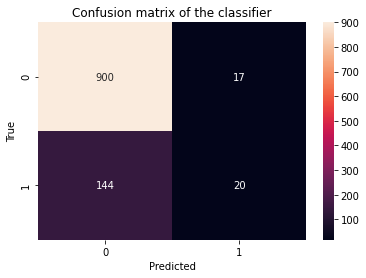

In [85]:
# make prediction
pred_cv = pipeline.predict(x_cv)

# calculate accuracy score
print(accuracy_score(y_cv, pred_cv))

# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [64]:
from joblib import dump, load

# Export the classifier to a file
dump(pipeline, f'{PATH}/models/model_lr.pkl') #, compress = 1


['C:\\Users\\masud.pervez\\Documents\\SEB_project\\seb_project//models/model_lr.pkl']

In [65]:
# To load the model again
clf= joblib.load(f'{PATH}/models/model_lr.joblib')
clf.predict(x_cv)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
pipeline.named_steps["lr"].coef_[::-1]

array([[-0.03723875, -0.70806502,  0.        ,  0.79520463, -0.5250062 ,
        -0.17806462, -0.76231057,  0.02760122, -0.21545371, -0.32826014,
        -0.11642938, -0.20529063,  6.33765961, -3.66644154,  3.21878566,
         0.19307983, -0.37076919,  0.3739067 , -0.2701884 ,  0.22613224,
         0.04719368]])

In [104]:
x_train.columns

Index(['GENDER', 'Age', 'ACTIVE', 'N_INHAB', 'N_CITIES', 'URBAN_RATIO',
       'AVG_SALARY', 'UNEMP_95', 'UNEMP_96', 'N_ENTR', 'CRIME_95', 'CRIME_96',
       'unique_dates', 'num_days', 'trans_amount', 'avg_balance',
       'type_most_CREDIT', 'type_most_WITHDRAWAL', 'operation_most_OTHERS',
       'operation_most_REMITTANCE_TO_OTHER_BANK',
       'operation_most_WITHDRAWAL_IN_CASH'],
      dtype='object')

In [183]:
# Get the names of each feature
feature_names = pipeline.named_steps["scaler"].get_feature_names()

# Get the coefficients of each feature
coefs = pipeline.named_steps["lr"].coef_.flatten()

# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)


import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

KeyError: 'scaler'

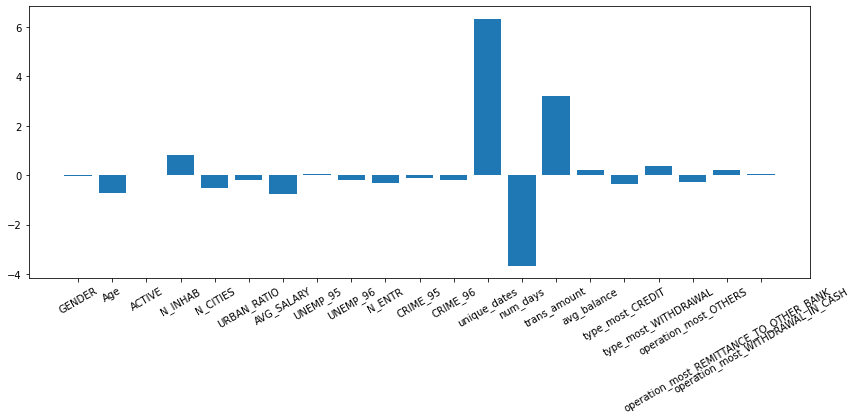

In [112]:
# get importance
importance = pipeline['lr'].coef_[0]
# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
plt.figure(figsize=(14,5))
plt.bar([x for x in x_train.columns], importance)
plt.xticks(rotation= 30, horizontalalignment="center")
plt.show()


### RandomForest

In [160]:

# Set up a pipeline with a feature selection preprocessor that
# selects the top 2 features to use.
# The pipeline then uses a RandomForestClassifier to train the model.

pipeline = Pipeline([
      ('imputer', SimpleImputer()),
      ('feature_selection', SelectKBest(chi2, k=10)), # Select Best 10 feature according to chi2;
      ('rf', RandomForestClassifier(n_estimators=200))
    ])

pipeline.fit(x_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('feature_selection',
                 SelectKBest(score_func=<function chi2 at 0x000001963123C5E0>)),
                ('rf', RandomForestClassifier(n_estimators=200))])

0.8584643848288621
[[902  15]
 [138  26]]


Text(33.0, 0.5, 'True')

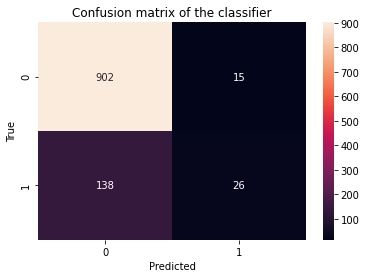

In [161]:
# make prediction
pred_cv = pipeline.predict(x_cv)

# calculate accuracy score
print(accuracy_score(y_cv, pred_cv))

# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [162]:
pipeline.fit(X , y)

pred_train= pipeline.predict(X)
print(accuracy_score(y, pred_train))

X_test= test[predictors]
y_test= test[target]
X_test['operation_most'] = np.where((X_test.operation_most =='COLLECTION_FROM_OTHER_BANK') | (X_test.operation_most== 'CREDIT_IN_CASH'),
                              'OTHERS', X_test.operation_most )

# adding dummies to the dataset
X_test = pd.get_dummies(X_test)
pred_test= pipeline.predict(X_test)
print(accuracy_score(y_test, pred_test))


1.0
0.8487208008898777


In [163]:
# import classification_report
from sklearn.metrics import classification_report
print("Model performance on train data\n", classification_report(y, pred_train))
print("Model performance on test data\n", classification_report(y_test, pred_test))


Model performance on train data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3055
           1       1.00      1.00      1.00       546

    accuracy                           1.00      3601
   macro avg       1.00      1.00      1.00      3601
weighted avg       1.00      1.00      1.00      3601

Model performance on test data
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       763
           1       0.50      0.12      0.19       136

    accuracy                           0.85       899
   macro avg       0.68      0.55      0.55       899
weighted avg       0.81      0.85      0.81       899



In [ ]:
# Get the names of each feature
feature_names = pipeline.named_steps["rf"].get_feature_names()

# Get the coefficients of each feature
coefs = pipeline.named_steps["lr"].coef_.flatten()

In [164]:
pipeline.named_steps["rf"].feature_importances_

array([0.09910089, 0.06219559, 0.06497685, 0.05758586, 0.05641101,
       0.1602181 , 0.14133565, 0.19454298, 0.15718115, 0.00645192])

In [165]:
pipeline.named_steps["feature_selection"].get_support(indices=True)

array([ 1,  3,  6, 10, 11, 12, 13, 14, 15, 16], dtype=int64)

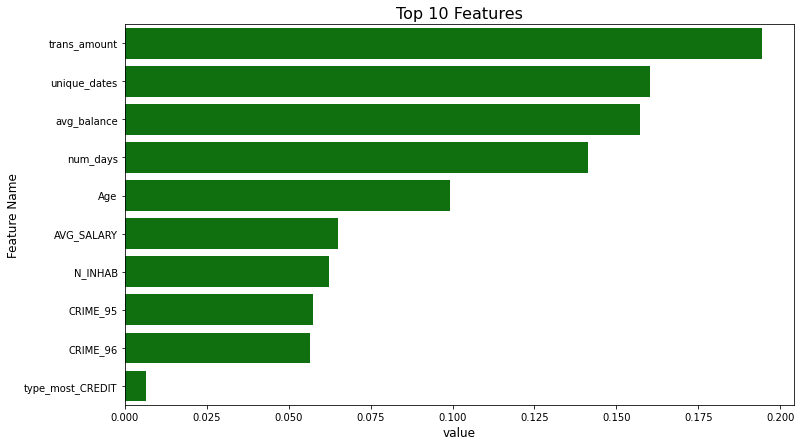

In [182]:
# Zip coefficients and names together and make a DataFrame
mask= mask = pipeline.named_steps["feature_selection"].get_support(indices=True)
feature_names = [j for i,j in enumerate(list(x_train.columns)) if i in mask]
coeff= pipeline.named_steps["rf"].feature_importances_

zipped = zip(feature_names, coeff)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)


import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="value", y="feature",
            data=df.head(10),
           palette=df.head(10)["colors"])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 10 Features", fontsize=16)
ax.set_xlabel("value", fontsize=12)
ax.set_ylabel("Feature Name", fontsize=12)
plt.show()

In [ ]:

# Export the classifier to a file
joblib.dump(pipeline, 'model_rf.joblib')

In [156]:
cols


array([ 3, 10, 11, 14, 15], dtype=int64)